In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
data= pd.read_csv('/content/Breast Cancer dataset.csv')
print(data.head())

     Patient_ID  Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD   36  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX   43  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079   69  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR   56  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF   56  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified

In [ ]:
# Check the null values
print("Number of null values:", data.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Check the shape
print("Shape:", data.shape)

# Drop rows with null values
data.dropna(inplace=True)

Number of null values: Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64
Number of duplicate rows: 0
Shape: (334, 16)


In [ ]:
columns_to_drop = ['Date_of_Surgery', 'Date_of_Last_Visit']

# Drop the specified columns
data1 = data.drop(columns=columns_to_drop)
print(data1.head())

     Patient_ID  Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD   36  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX   43  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079   69  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR   56  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF   56  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Patient_Status  
0  Modified Radical Mastectomy  

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = data1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])
    print(data1[col].head())

0    229
1    281
2     54
3    232
4    156
Name: Patient_ID, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64
0    2
1    1
2    2
3    1
4    1
Name: Tumour_Stage, dtype: int64
0    0
1    2
2    0
3    0
4    0
Name: Histology, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: ER status, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: PR status, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: HER2 status, dtype: int64
0    1
1    0
2    2
3    1
4    2
Name: Surgery_type, dtype: int64
0    0
1    1
2    0
3    0
4    1
Name: Patient_Status, dtype: int64


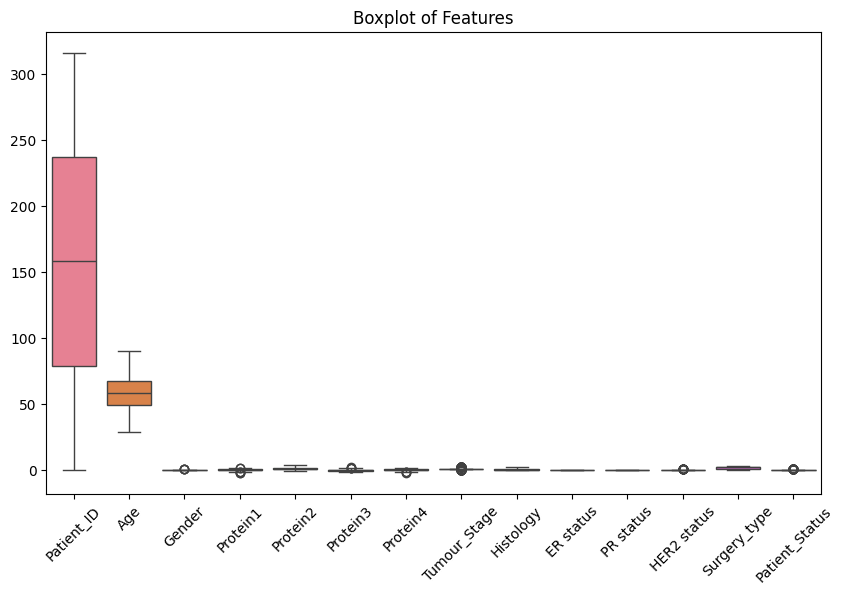

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()


# Define columns to check for outliers
columns_to_check = data1.columns

SELECTION OF FEATURES FOR ANOMALY DETECTION

In [ ]:
# Feature selection for One-Class SVM
# Selecting features relevant for the model
features = ['Tumour_Stage','Age','Surgery_type', 'Gender']
X = data1[features]

# For this example, we will create a target variable y where 1 indicates normal and 0 indicates anomaly
# Assuming 'Patient_Status' == 1 indicates normal and 'Patient_Status' == 0 indicates anomaly for demonstration
y = data1['Patient_Status']

STANDARDIZATION OF THE DATASET

In [ ]:
# 2. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CREATION AND FITTING OF A MODEL

In [ ]:
# Fit the One-Class SVM model on normal data
# Assuming label '1' corresponds to normal data
X_normal = X_scaled[y == 1]
model = OneClassSVM(kernel='rbf', gamma='auto').fit(X_normal)

In [ ]:
# Predict anomalies in the entire dataset
preds = model.predict(X_scaled)

CREATING A FEATURE ANOMALY

In [ ]:
# Convert predictions to 0 (normal) and 1 (anomaly)
anomalies = (preds == -1).astype(int)

VISUALIZATION USING PRINCIPAL COMPONENT ANALYSIS

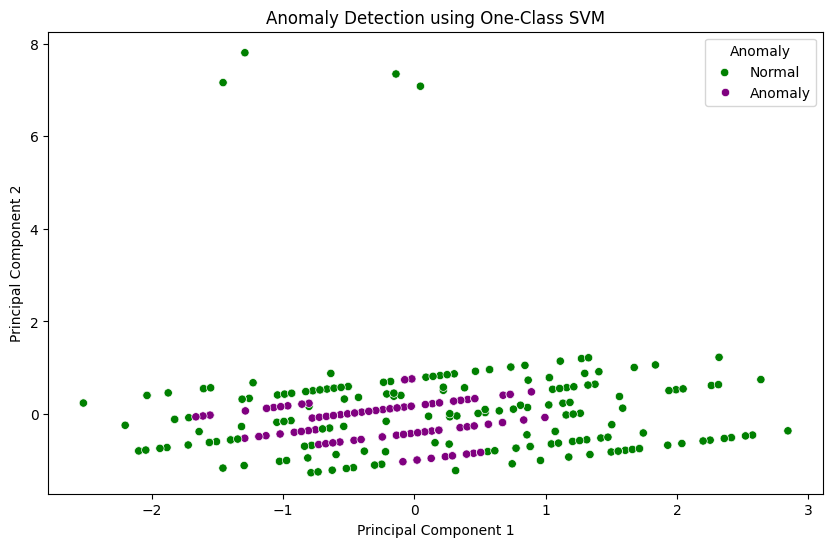

In [ ]:
# Visualization using PCA (Principal Component Analysis) for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=anomalies, palette={0: 'purple', 1: 'green'}, legend='full')
plt.title('Anomaly Detection using One-Class SVM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

NUMBER OF ANOMALIES DETECTED

In [ ]:
# Print results
print(f"Number of anomalies detected: {sum(anomalies)}")

Number of anomalies detected: 195


CREATING A NEW CSV FILE FOR THE ANOMALIES

In [ ]:
data1.to_csv('anomalies_in_mall_customers.csv', index=False)